In [1]:
import pandas as pd

# Data
Importing some dummy data to make the run the code.

In [2]:
df = pd.read_csv("Input data/example_orders.csv")[["status", "month", "user_email"]].sort_values("month")
df.head()

,status,month,user_email
20445,success,2020-01,a49ab9f3fda862b30e64877dca798863e962e388ccb929...
738,success,2020-01,dbc704e2a1428eba37e729cbb3bf306cbbef2b8a5201dd...
5171,success,2020-01,86ed7a61fd429a14a4a3b33d2005bcc50041743140c9a7...
14541,success,2020-01,685afb7ce4996b4dca5a580cf040b4742f2af35a7b782f...
23416,success,2020-01,fa4973052f2a11ec2de4979cd2a9c407c978d08ee9498f...


# Quarter analysis

Here, I will take the quarter **n** users and compare it to the users of the quarter **n-1**, to check who came back !

In [3]:
df_ret = df[["user_email", "month"]]
lst_month = df_ret.month.unique().tolist()

The dictionary's keys are defined beforehand

In [4]:
df_crr = {
    "quarter":[], # Dates defining the n quarter
    "users":[], # Number of users
}
for i in range(5):
    df_crr["quarter " + str(i+1) + " period"] = [] # Dates defining the n-1 quarter
    df_crr["quarter " + str(i+1) + " retained"] = [] # Number of n-1 quarter's users who came back during the n quarter
    df_crr["Q+" + str(i+1)] = [] # Percentage

In [5]:
period_month = 3
for i in range(len(lst_month)):
    # n-1 quarter
    prev_quarter = lst_month[i*period_month:(i+1)*period_month]

    # If not enough months are left to have a full quarter
    if len(prev_quarter) < period_month:
        break

    # Users of the n-1 quarter
    prev_users = df_ret[df_ret.month.isin(prev_quarter)].user_email.unique().tolist()
    df_crr["quarter"].append(prev_quarter[0] + " au " + prev_quarter[-1])
    df_crr["users"].append(len(prev_users))
    print("Current :", prev_quarter)

    # Comparing the n-1 quarter with n, n+1, ... n+4 quarters
    for j in range(5):
        next_quarter = lst_month[(i+j+1)*period_month:(i+j+2)*period_month]
        print("Next :", next_quarter)

        if len(next_quarter) < period_month:
            # If not enough months are left to have a full quarter, then empty
            df_crr["quarter " + str(j+1) + " period"].append("")
            df_crr["quarter " + str(j+1) + " retained"].append("")
            df_crr["Q+" + str(j+1)].append("")
        else:
            new_users = df_ret[df_ret.month.isin(next_quarter)].user_email.unique().tolist()
            users_retained = [x for x in prev_users if x in new_users]
            df_crr["quarter " + str(j+1) + " period"].append(next_quarter[0] + " au " + next_quarter[-1])
            df_crr["quarter " + str(j+1) + " retained"].append(len(users_retained))
            df_crr["Q+" + str(j+1)].append(len(users_retained)/len(prev_users))

Current : ['2020-01', '2020-02', '2020-03']
Next : ['2020-04', '2020-05', '2020-06']
Next : ['2020-07', '2020-08', '2020-09']
Next : ['2020-10', '2020-11', '2020-12']
Next : ['2021-01', '2021-02', '2021-03']
Next : ['2021-04', '2021-05', '2021-06']
Current : ['2020-04', '2020-05', '2020-06']
Next : ['2020-07', '2020-08', '2020-09']
Next : ['2020-10', '2020-11', '2020-12']
Next : ['2021-01', '2021-02', '2021-03']
Next : ['2021-04', '2021-05', '2021-06']
Next : ['2021-07', '2021-08', '2021-09']
Current : ['2020-07', '2020-08', '2020-09']
Next : ['2020-10', '2020-11', '2020-12']
Next : ['2021-01', '2021-02', '2021-03']
Next : ['2021-04', '2021-05', '2021-06']
Next : ['2021-07', '2021-08', '2021-09']
Next : ['2021-10', '2021-11', '2021-12']
Current : ['2020-10', '2020-11', '2020-12']
Next : ['2021-01', '2021-02', '2021-03']
Next : ['2021-04', '2021-05', '2021-06']
Next : ['2021-07', '2021-08', '2021-09']
Next : ['2021-10', '2021-11', '2021-12']
Next : ['2022-01', '2022-02', '2022-03']
Curr

In [6]:
df_quarter = pd.DataFrame(df_crr)
df_quarter.to_excel("Output data/Example_CRR_quarter_reverse.xlsx", index=False)
df_quarter.head()

,quarter,users,quarter 1 period,quarter 1 retained,Q+1,quarter 2 period,quarter 2 retained,Q+2,quarter 3 period,quarter 3 retained,Q+3,quarter 4 period,quarter 4 retained,Q+4,quarter 5 period,quarter 5 retained,Q+5
0,2020-01 au 2020-03,256,2020-04 au 2020-06,33,0.128906,2020-07 au 2020-09,40,0.15625,2020-10 au 2020-12,35,0.136719,2021-01 au 2021-03,25,0.097656,2021-04 au 2021-06,26,0.101562
1,2020-04 au 2020-06,405,2020-07 au 2020-09,62,0.153086,2020-10 au 2020-12,32,0.079012,2021-01 au 2021-03,41,0.101235,2021-04 au 2021-06,38,0.093827,2021-07 au 2021-09,46,0.11358
2,2020-07 au 2020-09,2346,2020-10 au 2020-12,179,0.0763,2021-01 au 2021-03,187,0.07971,2021-04 au 2021-06,206,0.087809,2021-07 au 2021-09,166,0.070759,2021-10 au 2021-12,140,0.059676
3,2020-10 au 2020-12,1744,2021-01 au 2021-03,280,0.16055,2021-04 au 2021-06,289,0.165711,2021-07 au 2021-09,240,0.137615,2021-10 au 2021-12,191,0.109518,2022-01 au 2022-03,198,0.113532
4,2021-01 au 2021-03,2977,2021-04 au 2021-06,458,0.153846,2021-07 au 2021-09,410,0.137723,2021-10 au 2021-12,310,0.104132,2022-01 au 2022-03,335,0.112529,,,


In [7]:
df_quarter[["quarter", "users", "Q+1", "Q+2", "Q+3", "Q+4", "Q+4"]]

,quarter,users,Q+1,Q+2,Q+3,Q+4,Q+4
0,2020-01 au 2020-03,256,0.128906,0.15625,0.136719,0.097656,0.097656
1,2020-04 au 2020-06,405,0.153086,0.079012,0.101235,0.093827,0.093827
2,2020-07 au 2020-09,2346,0.0763,0.07971,0.087809,0.070759,0.070759
3,2020-10 au 2020-12,1744,0.16055,0.165711,0.137615,0.109518,0.109518
4,2021-01 au 2021-03,2977,0.153846,0.137723,0.104132,0.112529,0.112529
5,2021-04 au 2021-06,4777,0.155118,0.105924,0.119322,,
6,2021-07 au 2021-09,6451,0.124167,0.131297,,,
7,2021-10 au 2021-12,5378,0.185385,,,,
8,2022-01 au 2022-03,8292,,,,,


# Semester analysis

Ah ..., here we go again. But this time with semesters !

It's always interesting to analyse over different periods, as customers have different return period depending on the market. For retail, the return period can be a week or less while for car wash it can take up to a semester for example.

In [8]:
df_crr = {
    "semester":[],
    "users":[],
}
for i in range(3):
    df_crr["semester " + str(i+1) + " period"] = []
    df_crr["semester " + str(i+1) + " retained"] = []
    df_crr["S+" + str(i+1)] = []

In [9]:
# Cutting the list so the last semester analyzed corresponds to ['2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03']
lst_month = lst_month[3:]

In [10]:
period_month = 6
for i in range(len(lst_month[2:])):

    prev_quarter = lst_month[i*period_month:(i+1)*period_month]

    if len(prev_quarter) < period_month:
        break

    prev_users = df_ret[df_ret.month.isin(prev_quarter)].user_email.unique().tolist()
    df_crr["semester"].append(prev_quarter[0] + " au " + prev_quarter[-1])
    df_crr["users"].append(len(prev_users))

    print("Current :", prev_quarter)

    for j in range(3):
        next_quarter = lst_month[(i+j+1)*period_month:(i+j+2)*period_month]
        print(next_quarter)
        if len(next_quarter) < period_month:
            df_crr["semester " + str(j+1) + " period"].append("")
            df_crr["semester " + str(j+1) + " retained"].append("")
            df_crr["S+" + str(j+1)].append("")
        else:
            new_users = df_ret[df_ret.month.isin(next_quarter)].user_email.unique().tolist()
            users_retained = [x for x in prev_users if x in new_users]
            df_crr["semester " + str(j+1) + " period"].append(next_quarter[0] + " au " + next_quarter[-1])
            df_crr["semester " + str(j+1) + " retained"].append(len(users_retained))
            df_crr["S+" + str(j+1)].append(len(users_retained)/len(prev_users))

Current : ['2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09']
['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03']
['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09']
['2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03']
Current : ['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03']
['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09']
['2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03']
[]
Current : ['2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09']
['2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03']
[]
[]
Current : ['2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03']
[]
[]
[]


In [11]:
df_semester = pd.DataFrame(df_crr)
df_semester.head()
df_semester.to_excel("Output data/Example_CRR_semester_reverse.xlsx", index=False)

In [12]:
df_semester[["semester", "users", "S+1", "S+2", "S+3"]]

,semester,users,S+1,S+2,S+3
0,2020-04 au 2020-09,2689,0.130904,0.135738,0.103012
1,2020-10 au 2021-03,4441,0.228327,0.167305,
2,2021-04 au 2021-09,10487,0.188614,,
3,2021-10 au 2022-03,12673,,,


# Outputs

As we say : "a picture is worth a thousand words". Or at least in this case, a figure.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
sns.set(rc={'figure.figsize':(10,10)})
plt.rcParams["axes.grid"] = False

In [15]:
df_quarter[["Q+1", "Q+2", "Q+3", "Q+4", "Q+5"]].max().max()

C:\Users\MorganeVIVES\AppData\Local\Temp\ipykernel_12284\230154176.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_quarter[["Q+1", "Q+2", "Q+3", "Q+4", "Q+5"]].max().max()


nan

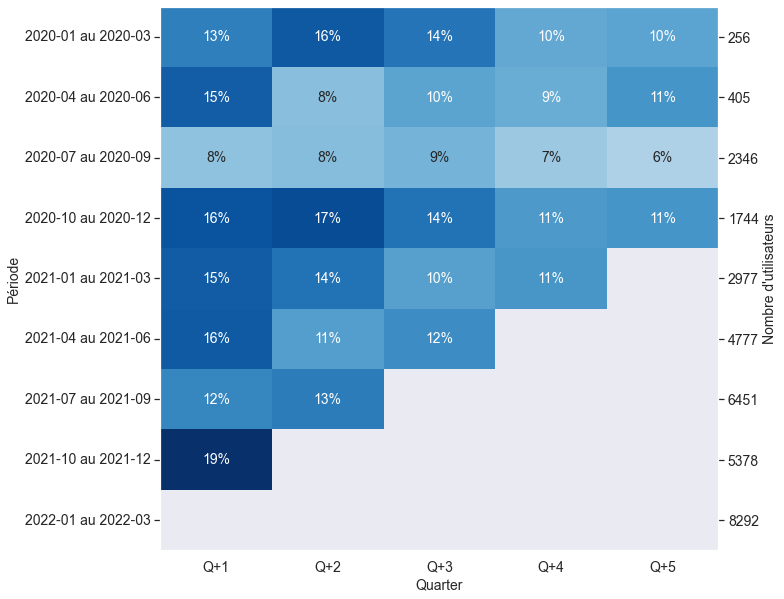

In [16]:
df_quarter = pd.read_excel("Output data/Example_CRR_quarter_reverse.xlsx")
y_axis_labels = df_quarter.quarter.to_list()
y2_axis_labels = df_quarter.users.to_list()
y2_axis_labels.reverse()

ax_qua = sns.heatmap(df_quarter[["Q+1", "Q+2", "Q+3", "Q+4", "Q+5"]],
                     annot = True,
                     yticklabels = y_axis_labels,
                     fmt = '.0%',
                     vmin = 0.0,
                     vmax = df_quarter[["Q+1", "Q+2", "Q+3", "Q+4", "Q+5"]].max().max(),
                     cmap="Blues",
                     cbar=False,
                     annot_kws={"size": 14})

ax3 = ax_qua.twinx()
# ax3.set_aspect("equal")
ax3.set_ylim([0,9])
ax3.set_yticks(ax_qua.get_yticks())
ax3.set_yticklabels(y2_axis_labels, fontsize=14)
ax3.set_ylabel("Nombre d'utilisateurs", fontsize=14)
ax3.tick_params(top=False)

ax_qua.set_xlabel("Quarter", fontsize=14)
ax_qua.set_ylabel("Période", fontsize=14)
ax_qua.tick_params(labelsize=14)

fig = ax_qua.get_figure()
fig.savefig("Figures/quarter_figure_CRR.png", bbox_inches='tight')

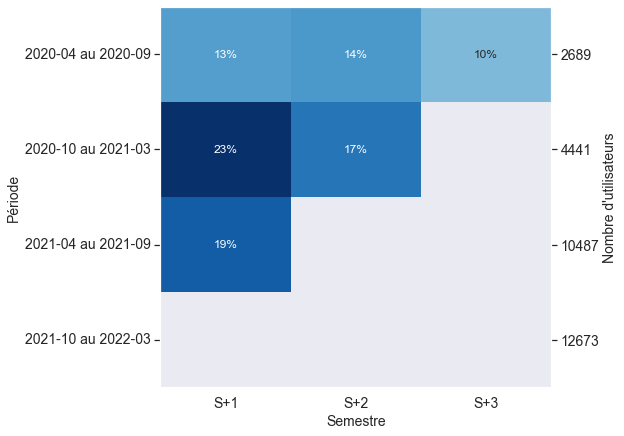

In [17]:
sns.set(rc={'figure.figsize':(7,7)})
plt.rcParams["axes.grid"] = False

df_semester = pd.read_excel("Output data/Example_CRR_semester_reverse.xlsx")
y_axis_labels = df_semester.semester.to_list()
y2_axis_labels = df_semester["users"].to_list()
y2_axis_labels.reverse()

ax_sem = sns.heatmap(df_semester[["S+1", "S+2", "S+3"]],
                     annot = True,
                     yticklabels = y_axis_labels,
                     fmt = '.0%',
                     vmin = 0.0,
                     vmax = df_semester[["S+1", "S+2", "S+3"]].max().max(),
                     cmap="Blues",
                     cbar=False)

ax3 = ax_sem.twinx()
# ax3.set_aspect("equal")
ax3.set_ylim([0,4])
ax3.set_yticks(ax_sem.get_yticks())
ax3.set_yticklabels(y2_axis_labels, fontsize=14)
ax3.set_ylabel("Nombre d'utilisateurs", fontsize=14)
ax3.tick_params(top=False)

ax_sem.set_xlabel("Semestre", fontsize=14)
ax_sem.set_ylabel("Période", fontsize=14)
ax_sem.tick_params(labelsize=14)

fig = ax_sem.get_figure()
fig.savefig("Figures/semester_figure_CRR.png", bbox_inches='tight')

# To conclude

Here the data is fake, so especially on the quarter's figure, it looks quite messy.

BUT, with real data, this could be due to customers having very different behaviours. Such as one "cluster" coming every week, another one once a month etc. With this technique, we mix all those customers.

One way to check that could be to analyse the customer return period more deeply before doing such analysis. Or to check n-1 quarter's users in n quarter and then, keep only the returning ones to compare with n-2 quarter. It really depends on what detail you want on your analysis.